# K-means

In [4]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris, make_blobs, make_regression, make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
%matplotlib inline

### Produce synthetic data

Get some synthetic data using the *make_blobs* function using $k=3$ clusters. The dataset consists of $\text{n_samples}=100$ observations and, for simplicity, just $\text{n_features}=2$ features.

In [227]:
nclust    = 3
nsamples  = 100
nfeatures = 2
X, y = make_blobs(n_samples = nsamples, n_features = nfeatures, centers = nclust, cluster_std = 1.2, random_state = 11)

Here, $X$ is a nsamples-by-nfeatures matrix and $y$ is a 1-by-nsamples vector of labels:

In [228]:
print('X (first 5 rows):')
print(X[:5,:])
print('\ny:',y)

X (first 5 rows):
[[-6.28783306 -9.53408918]
 [-1.18654378 -0.12553018]
 [-2.09030275  4.51907484]
 [-0.46938816 -1.10148237]
 [-7.03856146 -9.23201197]]

y: [0 2 1 2 0 1 0 1 1 0 2 2 0 2 0 0 0 0 1 0 2 2 2 0 0 2 1 0 1 1 0 2 2 2 0 1 0
 2 1 0 0 0 2 2 2 1 2 2 1 1 1 0 1 1 2 1 1 1 2 2 0 0 1 1 0 2 2 0 1 0 2 0 0 0
 2 1 2 0 1 0 2 0 0 0 2 2 2 1 1 1 1 1 1 2 1 2 0 2 1 1]


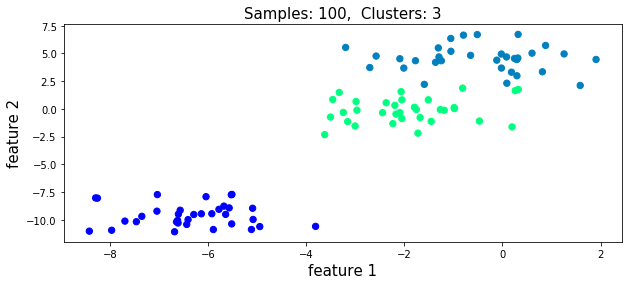

In [229]:
# Plot data
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.scatter(X[:,0], X[:,1], c=y, marker='o', s=40, cmap=plt.cm.winter) #, edgecolor='black')
ax.set_title('Samples: {},  Clusters: {}'.format(nsamples,nclust), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
plt.show()

Of course, we eventually don't know how data are labelled. 
Our task is, in fact, to find the inner structure of the data, which is, in this case, the $3$ visible clusters. 
Let us therefore visualise the data without passing the $y$ vector of labels and plot the data with just one color.

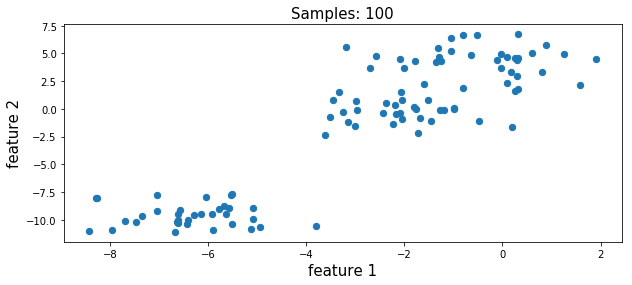

In [230]:
# Plot data
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.scatter(X[:,0], X[:,1], marker='o', s=40, cmap=plt.cm.winter)
ax.set_title('Samples: {}'.format(nsamples), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
plt.show()

## Finding cluster

The *K-Means* method takes in input the number of cluster that shoud be eventually found in the data. In our case, is reasonable to give in input $3$ (at least $2$), as we see that data is divided in three parts (maybe two). 

In [372]:
km = KMeans(n_clusters=3).fit(X)

*KMeans* returns *labels_* which is the array of labels of associated clusters:

In [373]:
km.labels_

array([1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2,
       2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0], dtype=int32)

and *cluster_centers_* which are the points representing the means of the points in the associated cluster:

In [374]:
km.cluster_centers_

array([[-0.44204087,  4.51257059],
       [-6.33926729, -9.59644494],
       [-1.98934259, -0.11142207]])

Let us visualise them:

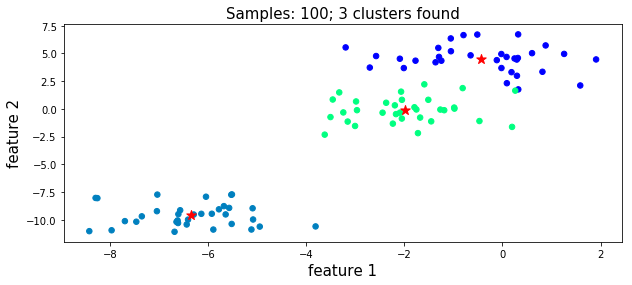

In [375]:
# Plot data
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.scatter(X[:,0], X[:,1], c=km.labels_, marker='o', s=30, cmap=plt.cm.winter)
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=100, color='red')
ax.set_title('Samples: {}; 3 clusters found'.format(nsamples), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
plt.show()

### Prediction

Given new instances, we can allocate them into the clusters that we have found.  

In [377]:
Xnew = np.array( [[-2.4,-7.4],[-0.1,0.1],[4.1,4.4]] )
pred = km.predict(Xnew)

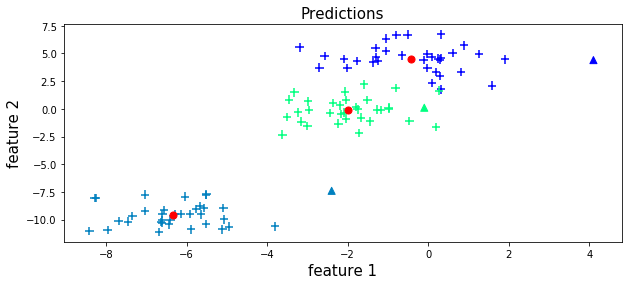

In [378]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.scatter(X[:,0], X[:,1], c=km.labels_, marker='+', s=70, cmap=plt.cm.winter)  #, edgecolor='black')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='o', s=50, color='red')  #, edgecolor='black')
ax.scatter(Xnew[:,0], Xnew[:,1], c=pred, marker='^', s=50, cmap=plt.cm.winter) #, color='red')  #, edgecolor='black')
ax.set_title('Predictions'.format(nsamples), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
plt.show()

### Find more clusters

Let us see how *K-means* would split the data into a different number of clusters.

In [379]:
# Number of clusters to find
ks = [2,3,4,5,6,7]

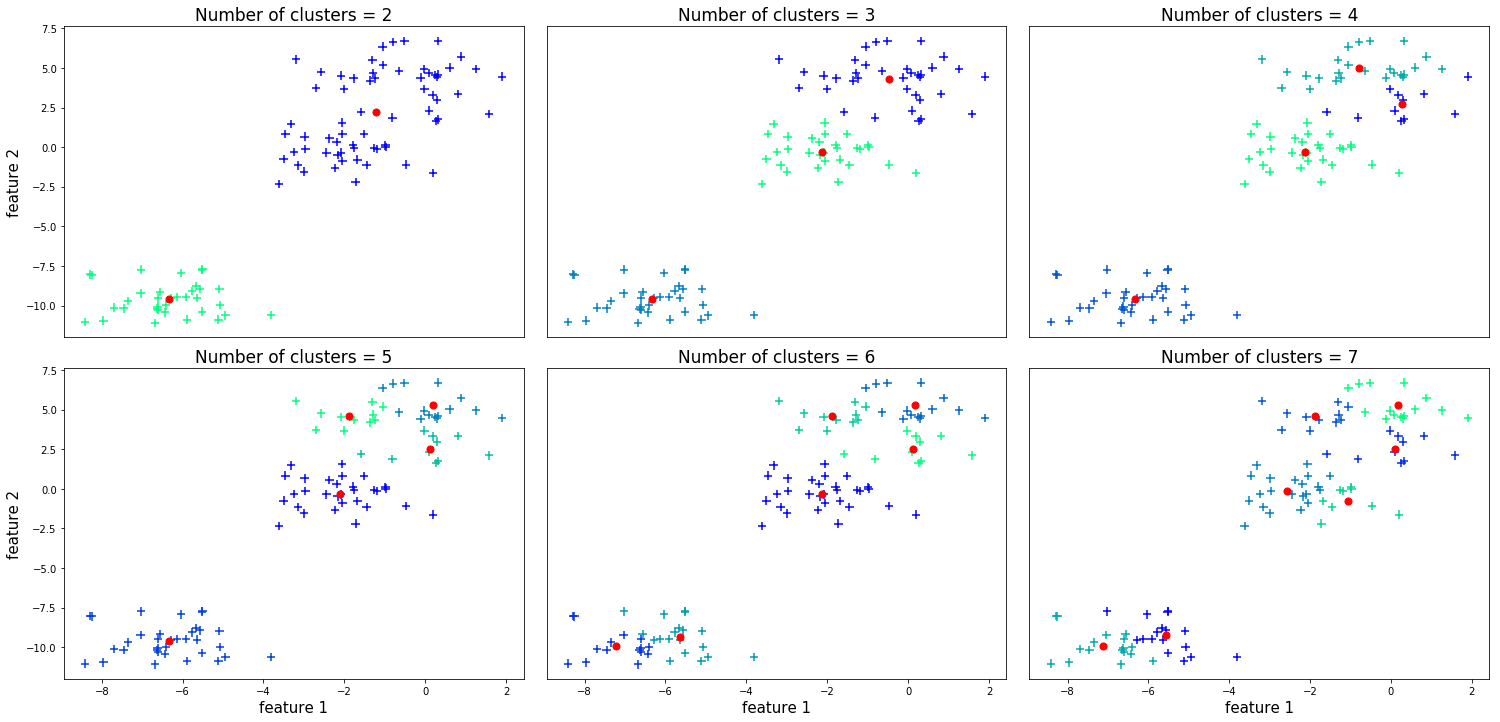

In [380]:
fig, ax = plt.subplots(2,3, figsize=(20, 12))
fig.subplots_adjust(left=0.01, right=1, hspace=0.1, wspace=0.05) 

ks = np.reshape(ks, (2,3))
for i in range(2):
    for j in range(3):
        
        # run k-means for current number of clusters
        km = KMeans(n_clusters=ks[i,j]).fit(X)
        
        # plot the result
        ax[i,j].scatter(X[:,0], X[:,1], c=km.labels_, marker='+', s=70, cmap=plt.cm.winter)  
        ax[i,j].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='o', s=50, color='red')
        ax[i,j].set_title('Number of clusters = {}'.format(ks[i,j]), fontsize=17) 
        if i==1: ax[i,j].set_xlabel('feature 1',fontsize=15)
        if i<1:  ax[i,j].set_xticks([])
        if j==0: ax[i,j].set_ylabel('feature 2',fontsize=15) 
        if j>0:  ax[i,j].set_yticks([])
    #endfor
#endfor

## Inertia
The *inertia* is defined as the sum of squared distances of samples to their closest cluster center. This is nothing but that the objective function that is minimized by *K-means*. 

That is, let $n$ be the number of observations and $K$ be the number of clusters. Also let:
   - $\mu_k$ denote the cluster centroid ($k=1,\dots,K$),
   - $\mu_{c^{(i)}}$ denote the cluster centroid of the cluster to which observation $x^{(i)}$ is assigned to.
Then, *K-means* finds the minumum of the following objective function (the inertia):
$$
J = \frac{1}{n} \sum_{i=1}^n || x^{(i)} - \mu_{c^{(i)}}||^2.
$$

The plot of the inertia for different number of clusters of the same dataset is often referred to as *elbow plot*.

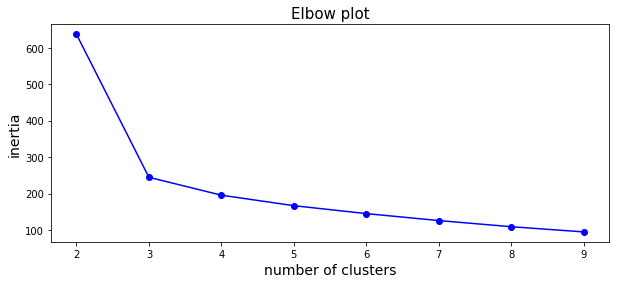

In [381]:
# Number of clusters to find
ks = range(2,10)

ssd = []
for k in ks:
    km = KMeans(n_clusters=k).fit(X)
    ssd.append(km.inertia_)
#endfor

# Plot inertia
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(ks, ssd, 'b-o')
ax.set_title('Elbow plot',fontsize=15) 
ax.set_ylabel('inertia',fontsize=14) 
ax.set_xlabel('number of clusters',fontsize=14) 

plt.show()

The name *elbow plot* arises from the shape of the inertia curve. We see that there is a large drop when passing 
from $2$ clusters to $3$ clusters, and then eventually a very slow decrease in magnitude from more than three clusters. 

This eventually suggests that $k=3$ was the most likely probable choice for the number of clusters to choose 
for te given dataset.